<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/neural_netwrok_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=200, n_features=1, noise=30)

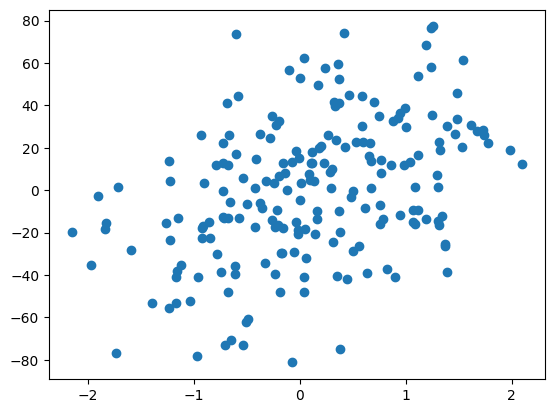

In [4]:
plt.scatter(x, y)
plt.show()

In [7]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [8]:
transforms = transforms.ToTensor()
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transforms)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 180MB/s]

Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 22.8MB/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 42.7MB/s]

Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.02MB/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



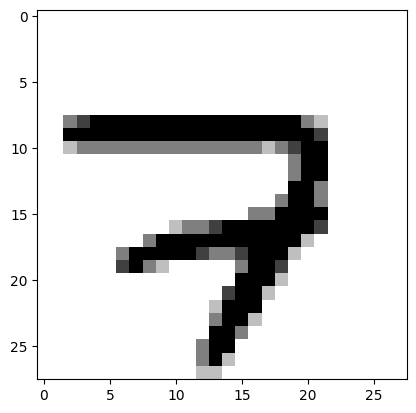

In [12]:
dataiter = iter(trainloader)
images, labels = next(dataiter)


plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [15]:
print(images[0].shape)
print(labels[0].shape)

torch.Size([1, 28, 28])
torch.Size([])


[Keras models](https://keras.io/api/applications/)

In [20]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(28*28, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return F.log_softmax(x, dim=1)

In [17]:
def train(model, trainloader, device):


  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
  start =  time()

  criteria = nn.NLLLoss()
  EPOCHS = 20
  model.train()

  for e in range(EPOCHS):
      running_loss = 0

      for images, labels in trainloader:
          images = images.view(images.shape[0], -1)
          optimizer.zero_grad()

          output = model(images.to(device))
          instant_loss = criteria(output, labels.to(device))

          instant_loss.backward()

          optimizer.step()

          running_loss += instant_loss.item()

      else:
          print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
  print("\nTraining Time (in minutes) =", (time()-start)/60)



In [19]:
def validate(model, valloader, device):
  correct_count, all_count = 0, 0
  for images,labels in valloader:
    for i in range(len(labels)):
      img = images[i].view(1, 784)

      with torch.no_grad():
        logps = model(img.to(device))

      ps = torch.exp(logps)
      probab = list(ps.cpu().numpy()[0])
      pred_label = probab.index(max(probab))
      true_label = labels.numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      all_count += 1

  print(f"Number Of Images Tested = {all_count}")
  print("\nModel Accuracy = {}%".format(correct_count*100/all_count))

In [21]:
model = Model()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Model(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)

In [22]:
train(model, trainloader, device)

Epoch 0 - Training loss: 1.1329860860732064
Epoch 1 - Training loss: 0.38321259525666107
Epoch 2 - Training loss: 0.31349249452606703
Epoch 3 - Training loss: 0.27696532650447603
Epoch 4 - Training loss: 0.24845394914322444
Epoch 5 - Training loss: 0.22319037743659417
Epoch 6 - Training loss: 0.20217293364676966
Epoch 7 - Training loss: 0.1845115471257965
Epoch 8 - Training loss: 0.16882310347008045
Epoch 9 - Training loss: 0.15669563477799328
Epoch 10 - Training loss: 0.14466013079648143
Epoch 11 - Training loss: 0.13439130868071686
Epoch 12 - Training loss: 0.12525332055842953
Epoch 13 - Training loss: 0.11710590884875832
Epoch 14 - Training loss: 0.10902058204282512
Epoch 15 - Training loss: 0.10211465281666691
Epoch 16 - Training loss: 0.09624644757302077
Epoch 17 - Training loss: 0.09031340829543531
Epoch 18 - Training loss: 0.08517582996238048
Epoch 19 - Training loss: 0.08038644254036835

Training Time (in minutes) = 3.482274556159973


In [23]:
validate(model, valloader, device)

Number Of Images Tested = 10000

Model Accuracy = 96.99%
